# Capstone project on python fundamentals

### Task 1

#### There are three different tables as given above. Please make three dataframes in python and save them as three .csv files. From Task 2 to Task 10, use the saved .csv files only. 

##### Task 1 is completed with all the required dataframes been created.
##### Along with thats been saved as csv format

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#creation of required dataframe 

#Project Dataframe creation

Project_df_dict = {
    "ID":pd.Series(["A001","A002","A003","A004","A005","A002","A005","A003","A001","A003","A001","A004","A004","A005"]),
    "Project":pd.Series(["Project1","Project2","Project3","Project4","Project5","Project6","Project7","Project8","Project9","Project10","Project11","Project12","Project13","Project14"]),
    "Cost":pd.Series([1002000,2000000,4500000,5500000,np.nan,680000,400000,350000,np.nan,300000,2000000,1000000,3000000,200000]),
    "Status":pd.Series(["Finished","Ongoing","Finished","Ongoing","Finished","Failed","Finished","Failed","Ongoing","Finished","Failed","Ongoing","Finished","Finished"])
}

Project_df_ddataframe=pd.DataFrame(Project_df_dict)
Project_df_ddataframe.set_index('ID',inplace=True)
Project_df_ddataframe
Project_df_ddataframe.to_csv("Data_set/Project Df.csv")

In [3]:
#Employee Dataframe creation

Employee_df_dict ={
    "ID":pd.Series(["A001","A002","A003","A004","A005"]),
    'Name':pd.Series(["John Alter","Alice Luxumberg","Tom Sabestine","Nina Adgra","Amy Johny"]),
    'City':pd.Series(['Paris','London','Berlin','Newyork','Madrid']),
    'Age':pd.Series([25,27,29,31,30])
}
Employee_df=pd.DataFrame(Employee_df_dict)
Employee_df.set_index("ID",inplace=True)
Employee_df
Employee_df.to_csv("Data_set/Employeee Df.csv")


In [4]:
#Seniority Level Dataframe creation
Senior_dict = {
    "ID":pd.Series(["A001","A002","A003","A004","A005"]),
    "Designation Level":pd.Series([2,2,3,2,3])
}
Senior_level_df=pd.DataFrame(Senior_dict)
Senior_level_df.set_index("ID",inplace=True)
Senior_level_df
Senior_level_df.to_csv("Data_set/Senior Level_Df.csv")

In [5]:
#readind all saved dataframe
project=pd.read_csv("Data_set/Project Df.csv")
print("Project Dataframe")
print(project.head(2),'\n')
employee=pd.read_csv("Data_set/Employeee Df.csv")
print("Employee Dataframe")
print(employee.head(2),'\n')
senior_level=pd.read_csv("Data_set/Senior Level_Df.csv")
print("Senior Level Dataframe")
print(senior_level.head(2),'\n')


Project Dataframe
     ID   Project       Cost    Status
0  A001  Project1  1002000.0  Finished
1  A002  Project2  2000000.0   Ongoing 

Employee Dataframe
     ID             Name    City  Age
0  A001       John Alter   Paris   25
1  A002  Alice Luxumberg  London   27 

Senior Level Dataframe
     ID  Designation Level
0  A001                  2
1  A002                  2 



### Task 2

#### The cost column in dataframe “Project” has some missing values. Your task is to compute these missing values. Replace the missing values by running average. You should use “For” loop for this task

In [6]:
#missing values available
print("Missing values in this dataframe:\n",project.isnull().sum())

Missing values in this dataframe:
 ID         0
Project    0
Cost       2
Status     0
dtype: int64


#### we can see there are two null values in this project dataset 

In [7]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       14 non-null     object 
 1   Project  14 non-null     object 
 2   Cost     12 non-null     float64
 3   Status   14 non-null     object 
dtypes: float64(1), object(3)
memory usage: 576.0+ bytes


In [8]:
#mean values
avg=int(project['Cost'].mean())
avg=float(avg)
avg

1744333.0

In [9]:
project

,ID,Project,Cost,Status
0,A001,Project1,1002000.0,Finished
1,A002,Project2,2000000.0,Ongoing
2,A003,Project3,4500000.0,Finished
3,A004,Project4,5500000.0,Ongoing
4,A005,Project5,NaN,Finished
5,A002,Project6,680000.0,Failed
6,A005,Project7,400000.0,Finished
7,A003,Project8,350000.0,Failed
8,A001,Project9,NaN,Ongoing
9,A003,Project10,300000.0,Finished


In [10]:
#filling missing value 
for i,e in project.iterrows():
    if type(e['Cost'])==float and pd.isna(e['Cost']):
        project.fillna(avg,inplace=True)
project        

,ID,Project,Cost,Status
0,A001,Project1,1002000.0,Finished
1,A002,Project2,2000000.0,Ongoing
2,A003,Project3,4500000.0,Finished
3,A004,Project4,5500000.0,Ongoing
4,A005,Project5,1744333.0,Finished
5,A002,Project6,680000.0,Failed
6,A005,Project7,400000.0,Finished
7,A003,Project8,350000.0,Failed
8,A001,Project9,1744333.0,Ongoing
9,A003,Project10,300000.0,Finished


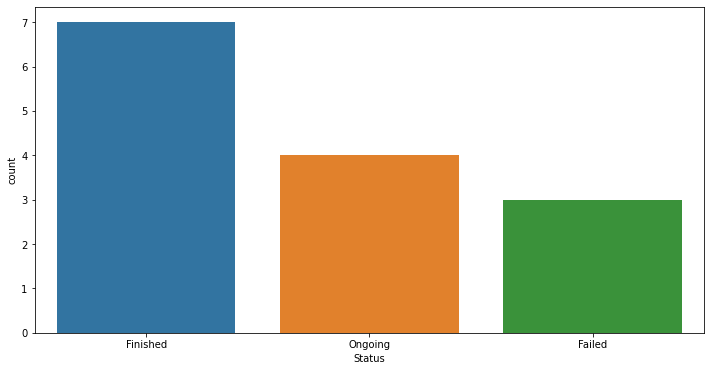

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x="Status",data=project)
plt.show()

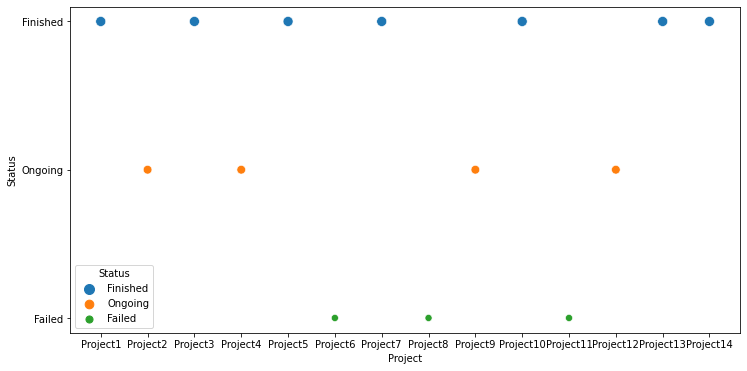

In [69]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Project",y='Status',data=project,hue='Status',size = "Status",sizes=(50,100))
plt.show()

### Task 3

#### Split the name column in Employee dataframe to two new columns “First Name”, “Last Name” and remove the older “name” column.

In [11]:
employee

,ID,Name,City,Age
0,A001,John Alter,Paris,25
1,A002,Alice Luxumberg,London,27
2,A003,Tom Sabestine,Berlin,29
3,A004,Nina Adgra,Newyork,31
4,A005,Amy Johny,Madrid,30


In [12]:
# adding first name and last name

employee[["First_Name","Last_Name"]]=employee["Name"].str.split(expand=True)

In [13]:
employee.head(2)

,ID,Name,City,Age,First_Name,Last_Name
0,A001,John Alter,Paris,25,John,Alter
1,A002,Alice Luxumberg,London,27,Alice,Luxumberg


In [14]:
#deleting name column

del(employee['Name'])

In [15]:
employee

,ID,City,Age,First_Name,Last_Name
0,A001,Paris,25,John,Alter
1,A002,London,27,Alice,Luxumberg
2,A003,Berlin,29,Tom,Sabestine
3,A004,Newyork,31,Nina,Adgra
4,A005,Madrid,30,Amy,Johny


### Task 4

#### Join all three dataframes in one single dataframe. Name it “Final”

In [32]:
Final=project.merge(employee,on = 'ID').merge(senior_level,on='ID')

In [33]:
Final

,ID,Project,Cost,Status,City,Age,First_Name,Last_Name,Designation Level
0,A001,Project1,1002000.0,Finished,Paris,25,John,Alter,2
1,A001,Project9,1744333.0,Ongoing,Paris,25,John,Alter,2
2,A001,Project11,2000000.0,Failed,Paris,25,John,Alter,2
3,A002,Project2,2000000.0,Ongoing,London,27,Alice,Luxumberg,2
4,A002,Project6,680000.0,Failed,London,27,Alice,Luxumberg,2
5,A003,Project3,4500000.0,Finished,Berlin,29,Tom,Sabestine,3
6,A003,Project8,350000.0,Failed,Berlin,29,Tom,Sabestine,3
7,A003,Project10,300000.0,Finished,Berlin,29,Tom,Sabestine,3
8,A004,Project4,5500000.0,Ongoing,Newyork,31,Nina,Adgra,2
9,A004,Project12,1000000.0,Ongoing,Newyork,31,Nina,Adgra,2


In [34]:
Final.head(2)

,ID,Project,Cost,Status,City,Age,First_Name,Last_Name,Designation Level
0,A001,Project1,1002000.0,Finished,Paris,25,John,Alter,2
1,A001,Project9,1744333.0,Ongoing,Paris,25,John,Alter,2


### Task 5

#### Add a new bonus column in Final dataframe. Give 5% bonus concerning project cost only for employees who have finished the projects.

In [35]:
Final['Bonus']=Final.apply(lambda x:x['Cost']*0.05 if x['Status']=='Finished' else x['Cost'],axis=1)

In [36]:
Final.head()

,ID,Project,Cost,Status,City,Age,First_Name,Last_Name,Designation Level,Bonus
0,A001,Project1,1002000.0,Finished,Paris,25,John,Alter,2,50100.0
1,A001,Project9,1744333.0,Ongoing,Paris,25,John,Alter,2,1744333.0
2,A001,Project11,2000000.0,Failed,Paris,25,John,Alter,2,2000000.0
3,A002,Project2,2000000.0,Ongoing,London,27,Alice,Luxumberg,2,2000000.0
4,A002,Project6,680000.0,Failed,London,27,Alice,Luxumberg,2,680000.0


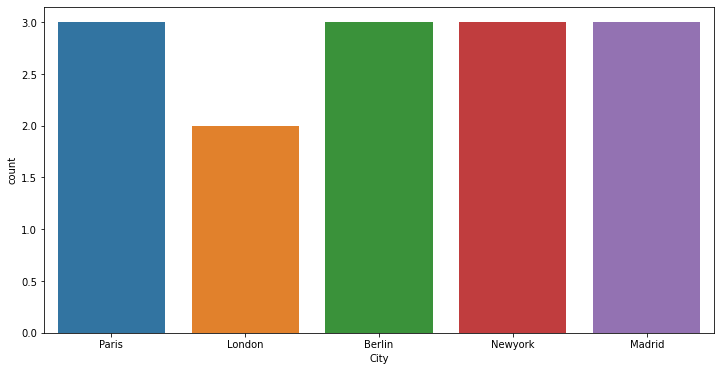

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(x="City",data=Final)
plt.show()

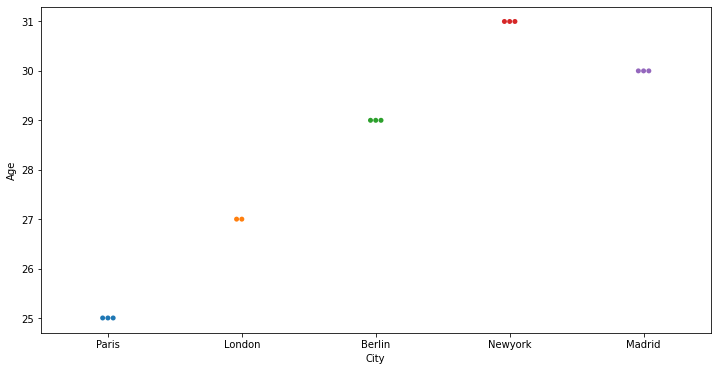

In [76]:
plt.figure(figsize=(12,6))
sns.swarmplot(x="City",y='Age',data=Final)
plt.show()

### Task 6

#### Decrease the designation level by 1, whose projects have status “fail”. Delete the employee record whose designation level is below 4. 

In [37]:
Final['Designation Level']=Final.apply(lambda x:x['Designation Level']-1 if x['Status'] == 'Failed' else x['Designation Level'],axis=1)


In [38]:
Final

,ID,Project,Cost,Status,City,Age,First_Name,Last_Name,Designation Level,Bonus
0,A001,Project1,1002000.0,Finished,Paris,25,John,Alter,2,50100.00
1,A001,Project9,1744333.0,Ongoing,Paris,25,John,Alter,2,1744333.00
2,A001,Project11,2000000.0,Failed,Paris,25,John,Alter,1,2000000.00
3,A002,Project2,2000000.0,Ongoing,London,27,Alice,Luxumberg,2,2000000.00
4,A002,Project6,680000.0,Failed,London,27,Alice,Luxumberg,1,680000.00
5,A003,Project3,4500000.0,Finished,Berlin,29,Tom,Sabestine,3,225000.00
6,A003,Project8,350000.0,Failed,Berlin,29,Tom,Sabestine,2,350000.00
7,A003,Project10,300000.0,Finished,Berlin,29,Tom,Sabestine,3,15000.00
8,A004,Project4,5500000.0,Ongoing,Newyork,31,Nina,Adgra,2,5500000.00
9,A004,Project12,1000000.0,Ongoing,Newyork,31,Nina,Adgra,2,1000000.00


In [23]:
Final=Final.drop(Final[Final['Designation Level']<4].index)

In [39]:
Final

,ID,Project,Cost,Status,City,Age,First_Name,Last_Name,Designation Level,Bonus
0,A001,Project1,1002000.0,Finished,Paris,25,John,Alter,2,50100.00
1,A001,Project9,1744333.0,Ongoing,Paris,25,John,Alter,2,1744333.00
2,A001,Project11,2000000.0,Failed,Paris,25,John,Alter,1,2000000.00
3,A002,Project2,2000000.0,Ongoing,London,27,Alice,Luxumberg,2,2000000.00
4,A002,Project6,680000.0,Failed,London,27,Alice,Luxumberg,1,680000.00
5,A003,Project3,4500000.0,Finished,Berlin,29,Tom,Sabestine,3,225000.00
6,A003,Project8,350000.0,Failed,Berlin,29,Tom,Sabestine,2,350000.00
7,A003,Project10,300000.0,Finished,Berlin,29,Tom,Sabestine,3,15000.00
8,A004,Project4,5500000.0,Ongoing,Newyork,31,Nina,Adgra,2,5500000.00
9,A004,Project12,1000000.0,Ongoing,Newyork,31,Nina,Adgra,2,1000000.00


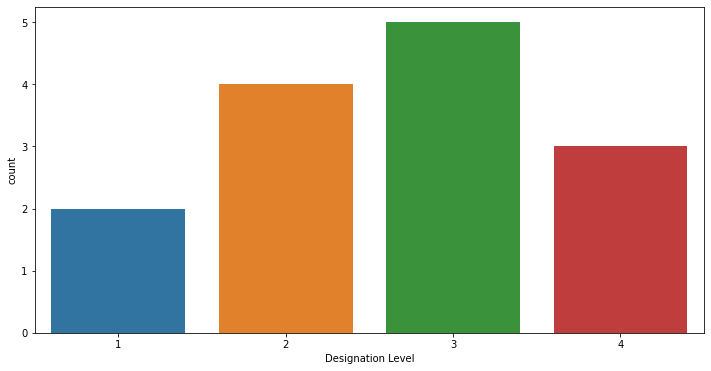

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x="Designation Level",data=Final)
plt.show()

### Task 7

#### Add a new column for gender, than add “Mr.” and “Mrs” to the first name column

In [26]:
!pip install gender-guesser

Defaulting to user installation because normal site-packages is not writeable


In [27]:
Final.columns

Index(['ID', 'Project', 'Cost', 'Status', 'City', 'Age', 'First_Name',
       'Last_Name', 'Designation Level', 'Bonus'],
      dtype='object')

In [40]:
import gender_guesser.detector as gender
def infer_gender(Final,Gender):
    d=gender.Detector()
    gd=Final['First_Name'].apply(lambda name:d.get_gender(name))
    gd=gd.map({'male':'Male','female':'Female','mostly_male':'Male','mostly_female':'Female','unknown':'Unknown'})
    Final['Gender']=gd
    return Final


In [41]:
Final = infer_gender(Final, Gender=None)
Final

,ID,Project,Cost,Status,City,Age,First_Name,Last_Name,Designation Level,Bonus,Gender
0,A001,Project1,1002000.0,Finished,Paris,25,John,Alter,2,50100.00,Male
1,A001,Project9,1744333.0,Ongoing,Paris,25,John,Alter,2,1744333.00,Male
2,A001,Project11,2000000.0,Failed,Paris,25,John,Alter,1,2000000.00,Male
3,A002,Project2,2000000.0,Ongoing,London,27,Alice,Luxumberg,2,2000000.00,Female
4,A002,Project6,680000.0,Failed,London,27,Alice,Luxumberg,1,680000.00,Female
5,A003,Project3,4500000.0,Finished,Berlin,29,Tom,Sabestine,3,225000.00,Male
6,A003,Project8,350000.0,Failed,Berlin,29,Tom,Sabestine,2,350000.00,Male
7,A003,Project10,300000.0,Finished,Berlin,29,Tom,Sabestine,3,15000.00,Male
8,A004,Project4,5500000.0,Ongoing,Newyork,31,Nina,Adgra,2,5500000.00,Female
9,A004,Project12,1000000.0,Ongoing,Newyork,31,Nina,Adgra,2,1000000.00,Female


In [42]:
Final['First_Name'] = Final.apply(lambda x: 'Mr. ' + x['First_Name'] if x['Gender'] == 'Male' else 'Mrs. ' + x['First_Name'], axis=1)

In [43]:
Final

,ID,Project,Cost,Status,City,Age,First_Name,Last_Name,Designation Level,Bonus,Gender
0,A001,Project1,1002000.0,Finished,Paris,25,Mr. John,Alter,2,50100.00,Male
1,A001,Project9,1744333.0,Ongoing,Paris,25,Mr. John,Alter,2,1744333.00,Male
2,A001,Project11,2000000.0,Failed,Paris,25,Mr. John,Alter,1,2000000.00,Male
3,A002,Project2,2000000.0,Ongoing,London,27,Mrs. Alice,Luxumberg,2,2000000.00,Female
4,A002,Project6,680000.0,Failed,London,27,Mrs. Alice,Luxumberg,1,680000.00,Female
5,A003,Project3,4500000.0,Finished,Berlin,29,Mr. Tom,Sabestine,3,225000.00,Male
6,A003,Project8,350000.0,Failed,Berlin,29,Mr. Tom,Sabestine,2,350000.00,Male
7,A003,Project10,300000.0,Finished,Berlin,29,Mr. Tom,Sabestine,3,15000.00,Male
8,A004,Project4,5500000.0,Ongoing,Newyork,31,Mrs. Nina,Adgra,2,5500000.00,Female
9,A004,Project12,1000000.0,Ongoing,Newyork,31,Mrs. Nina,Adgra,2,1000000.00,Female


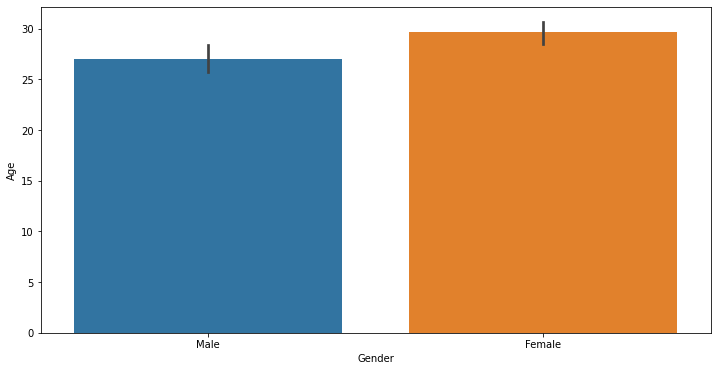

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(x='Gender',y='Age',data=Final)
plt.show()


### Task 8

#### Increase designation level by 1 for the employees whose age is more than 29 years using IF condition

In [44]:
Final.columns

Index(['ID', 'Project', 'Cost', 'Status', 'City', 'Age', 'First_Name',
       'Last_Name', 'Designation Level', 'Bonus', 'Gender'],
      dtype='object')

In [45]:
Final['Designation Level']=Final.apply(lambda x:x['Designation Level']+1 if x['Age']>29 else x['Designation Level'],axis=1)

In [46]:
Final

,ID,Project,Cost,Status,City,Age,First_Name,Last_Name,Designation Level,Bonus,Gender
0,A001,Project1,1002000.0,Finished,Paris,25,Mr. John,Alter,2,50100.00,Male
1,A001,Project9,1744333.0,Ongoing,Paris,25,Mr. John,Alter,2,1744333.00,Male
2,A001,Project11,2000000.0,Failed,Paris,25,Mr. John,Alter,1,2000000.00,Male
3,A002,Project2,2000000.0,Ongoing,London,27,Mrs. Alice,Luxumberg,2,2000000.00,Female
4,A002,Project6,680000.0,Failed,London,27,Mrs. Alice,Luxumberg,1,680000.00,Female
5,A003,Project3,4500000.0,Finished,Berlin,29,Mr. Tom,Sabestine,3,225000.00,Male
6,A003,Project8,350000.0,Failed,Berlin,29,Mr. Tom,Sabestine,2,350000.00,Male
7,A003,Project10,300000.0,Finished,Berlin,29,Mr. Tom,Sabestine,3,15000.00,Male
8,A004,Project4,5500000.0,Ongoing,Newyork,31,Mrs. Nina,Adgra,3,5500000.00,Female
9,A004,Project12,1000000.0,Ongoing,Newyork,31,Mrs. Nina,Adgra,3,1000000.00,Female


### Task 9

#### Add the cost of all projects for each Employee and save it in new dataframe “TotalProjCost” with three columns ID, First Name, and Total cost

In [47]:
Final

,ID,Project,Cost,Status,City,Age,First_Name,Last_Name,Designation Level,Bonus,Gender
0,A001,Project1,1002000.0,Finished,Paris,25,Mr. John,Alter,2,50100.00,Male
1,A001,Project9,1744333.0,Ongoing,Paris,25,Mr. John,Alter,2,1744333.00,Male
2,A001,Project11,2000000.0,Failed,Paris,25,Mr. John,Alter,1,2000000.00,Male
3,A002,Project2,2000000.0,Ongoing,London,27,Mrs. Alice,Luxumberg,2,2000000.00,Female
4,A002,Project6,680000.0,Failed,London,27,Mrs. Alice,Luxumberg,1,680000.00,Female
5,A003,Project3,4500000.0,Finished,Berlin,29,Mr. Tom,Sabestine,3,225000.00,Male
6,A003,Project8,350000.0,Failed,Berlin,29,Mr. Tom,Sabestine,2,350000.00,Male
7,A003,Project10,300000.0,Finished,Berlin,29,Mr. Tom,Sabestine,3,15000.00,Male
8,A004,Project4,5500000.0,Ongoing,Newyork,31,Mrs. Nina,Adgra,3,5500000.00,Female
9,A004,Project12,1000000.0,Ongoing,Newyork,31,Mrs. Nina,Adgra,3,1000000.00,Female


In [48]:
Total_cost=Final.groupby('ID').sum()
Total_cost=Total_cost.drop(['Age','Designation Level','Bonus'],axis=1)
Total_cost.rename(columns={'Cost':"Total_cost"},inplace=True)
Total_cost

,Total_cost
ID,
A001,4746333.0
A002,2680000.0
A003,5150000.0
A004,9500000.0
A005,2344333.0


In [49]:
TotalProjCost=Final.filter(["ID",'First_Name'])
TotalProjCost

,ID,First_Name
0,A001,Mr. John
1,A001,Mr. John
2,A001,Mr. John
3,A002,Mrs. Alice
4,A002,Mrs. Alice
5,A003,Mr. Tom
6,A003,Mr. Tom
7,A003,Mr. Tom
8,A004,Mrs. Nina
9,A004,Mrs. Nina


In [50]:
TotalProjCost = TotalProjCost.merge(Total_cost,on='ID')
TotalProjCost

,ID,First_Name,Total_cost
0,A001,Mr. John,4746333.0
1,A001,Mr. John,4746333.0
2,A001,Mr. John,4746333.0
3,A002,Mrs. Alice,2680000.0
4,A002,Mrs. Alice,2680000.0
5,A003,Mr. Tom,5150000.0
6,A003,Mr. Tom,5150000.0
7,A003,Mr. Tom,5150000.0
8,A004,Mrs. Nina,9500000.0
9,A004,Mrs. Nina,9500000.0


### Task 10

#### Print all the employee details whose city name contains the letter “o” in it

In [51]:
Final.columns

Index(['ID', 'Project', 'Cost', 'Status', 'City', 'Age', 'First_Name',
       'Last_Name', 'Designation Level', 'Bonus', 'Gender'],
      dtype='object')

In [52]:
city=Final.apply(lambda x:True if "o" in x['City'] else False,axis=1)

In [53]:
Final[city]

,ID,Project,Cost,Status,City,Age,First_Name,Last_Name,Designation Level,Bonus,Gender
3,A002,Project2,2000000.0,Ongoing,London,27,Mrs. Alice,Luxumberg,2,2000000.0,Female
4,A002,Project6,680000.0,Failed,London,27,Mrs. Alice,Luxumberg,1,680000.0,Female
8,A004,Project4,5500000.0,Ongoing,Newyork,31,Mrs. Nina,Adgra,3,5500000.0,Female
9,A004,Project12,1000000.0,Ongoing,Newyork,31,Mrs. Nina,Adgra,3,1000000.0,Female
10,A004,Project13,3000000.0,Finished,Newyork,31,Mrs. Nina,Adgra,3,150000.0,Female


## Thankyou